<center>
<a href="https://www.fst.ac.ma/site/" ><img src="./logo.png" style="float:left; max-width: 100px; display: inline"/></a> 
<a href="https://github.com/hafs96/Prediction_Consommation-de-carburant" ><img src="./github.png" style="float:right; max-width: 50px; display: inline " /></a>
</center>
<div id="report" style="text-align: center; padding: 10px; background-color:rgb(249, 249, 249); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); ">
  <h1 style="font-size: 2.2em; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">
    Modélisation et Prédiction de la Consommation de Carburant par Mille Gallons
  </h1>
  <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #34495e; margin: 5px 0;">
    Rédigé par :
  </p>

  <div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 5px; justify-items: center; margin-bottom: 10px;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #2c3e50; font-weight: bold;">
      &#9733; ZIAN Hafsa
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #2c3e50; font-weight: bold;">
      &#9733; HAYHAY Yasmine
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #2c3e50; font-weight: bold;">
      &#9733; ALLAHYANI Aya
    </p>
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #2c3e50; font-weight: bold;">
      &#9733; EL AZAMI Kaouthar 
    </p>
  </div>

  <div style="margin-top: 15px; padding: 5px; background-color: #ecf0f1; border-left: 4px solid rgb(127, 50, 129); border-radius: 8px; display: inline-block; max-width: 60%;">
    <p style="font-size: 1.1em; font-family: 'Arial', sans-serif; color: #2c3e50; margin: 0; font-style: italic;">
      Encadré par : 
      <span style="font-weight: bold; color:rgb(54, 10, 41);">Pr. Soumaia Afilal</span>
    </p>
  </div>
</div> 

<div id="report" style="text-align: center; padding: 20px;">
  <h1 style="font-size: 2em; font-family: 'Georgia', serif; color: #fff; background-color: #333; padding: 10px;">  
  &#9733; Contenu du rapport  &#9733; </h1>
</div>


1. <a href="#probleme">Introduction au Problème</a><br>

2. <a href="#metadonnees">Métadonnées</a><br>

3. <a href="#pretraitement">Prétraitement</a><br>
    3.1 <a href="#import-bibliotheques">Importation des Bibliothèques</a><br>
    3.2 <a href="#chargement-donnees">Chargement des Données</a><br>
    3.3 <a href="#valeurs-manquantes">Vérification des Valeurs Manquantes</a><br>
    3.4 <a href="#standardisation">Standardisation des Marques</a><br>
    3.5 <a href="#creation-variable">Création de la Variable Binaire `mpg01`</a><br>


4. <a href="#exploration">Exploration et Visualisation des Données</a><br>
    4.1 <a href="#relations-variables">Visualisation des Relations entre les Variables</a><br>
    4.2 <a href="#analyse-marques">Analyse des Marques par Consommation</a><br>
    4.3 <a href="#graphiques-categorielles">Graphiques pour les Caractéristiques Catégorielles</a><br>

5. <a href="#correlation">Analyse de Corrélation entre les Données</a><br>

6. <a href="#preparation-donnees">Préparation des Données pour la Modélisation</a><br>
    6.1 <a href="#separation-donnees">Séparation des Données en Enseignement et Test</a><br>

7. <a href="#modelisation">Modélisation</a><br>
    7.1 <a href="#lda">Analyse Discriminante Linéaire (LDA)</a><br>
    7.2 <a href="#qda">Analyse Discriminante Quadratique (QDA)</a><br>
    7.5 <a href="#lq">LDA ou QDA </a><br>
    7.4 <a href="#logistique">Régression Logistique</a><br>
    7.5 <a href="#knn">K-Nearest Neighbors (KNN)</a><br>

8. <a href="#evaluation">Évaluation et Conclusion</a><br>
    8.1 <a href="#resume-resultats">Résumé des Résultats des Modèles</a><br>
    8.2 <a href="#analyse-comparative">Analyse Comparative des Modèles</a><br>
    8.3 <a href="#conclusion-generale">Conclusion Générale</a><br>
    
9. <a href="#references">Références</a><br>

<span id="probleme"></span>

## 1. Introduction au Problème <span id="probleme"></span>

Dans ce projet, l'objectif est de développer un modèle permettant de prédire si une voiture a une consommation de carburant élevée ou faible en fonction de ses caractéristiques techniques.



<a href="#report"><button>&#8593;</button></a>

## 2-Métadonnées <span id="metadonnees"></span>

Le jeu de données utilisé, appelé Auto, contient plusieurs variables descriptives liées aux performances et aux spécifications des véhicules, notamment :

- **mpg** : `Efficacité énergétique mesurée en miles par gallon (mpg)` 
- **cylindres**: `Nombre de cylindres du moteur.`
- **déplacement** : `Volume du moteur (en pouces cubes).`
- **puissance** : `Puissance du moteur (en chevaux).`
- **poids** : `Poids du véhicule (en livres).`
- **accélération** : `Temps requis pour passer de 0 à 60 mph (en secondes).`
- **année** : `Année de fabrication.`
- **origine** : `Région d'origine du véhicule.`
- **nom** : `Nom du modèle de voiture.`


<a href="#report"><button>&#8593;</button></a>

## 3-Pretraitement <span id="pretraitement"></span>


### 3-1.Importation des bibliothèques : <span id="import-bibliotheques"></span>

In [33]:
import pandas as pd #manipuler et analyser des données tabulaires
import seaborn as sns #facilite la création de visualisations statistiques attrayantes et informatives.
import numpy as np # manipuler des tableaux et effectuer des calculs mathématiques sur des ensembles de données numériques.
import matplotlib.pyplot as plt #créer des visualisations graphiques.
import warnings #gérer les avertissements.
warnings.filterwarnings('ignore') #Désactive les messages d'avertissement. 


<a href="#report"><button>&#8593;</button></a>

### 3-2.Chargement des données : <span id="chargement-donnees"></span>

In [34]:
donnees=pd.read_csv("pr3_data.csv",sep=",")

In [35]:
donnees.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
#Examiner les dernières lignes de DataFrame
donnees.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [37]:
#Un aperçu rapide de la taille de données
donnees.shape

(398, 9)

In [38]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<a href="#report"><button>&#8593;</button></a>

### 3-3.Vérification des Valeurs Manquantes : <span id="valeurs-manquantes" ></span>

In [39]:
#détecter et gérer les valeurs manquantes avant de poursuivre l'analyse ou la modélisation.
donnees.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [40]:
donnees.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

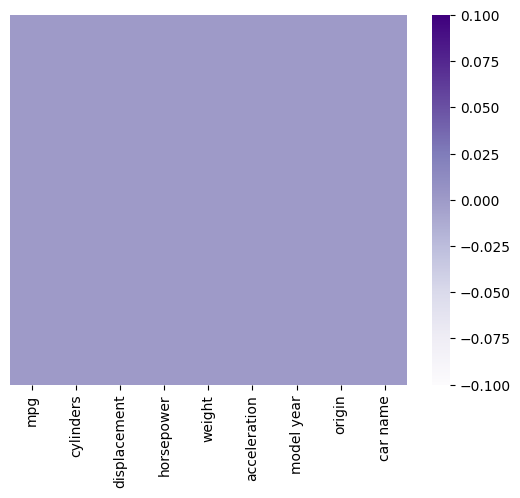

In [41]:
sns.heatmap(donnees.isnull(),yticklabels=False,cmap="Purples")

---> Parfait, La heatmap montre qu'il n'y a pas de valeurs manquantes dans le jeu de données, toutes les cellules sont complètes.

In [42]:
#Les colonnes 
donnees.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [43]:
#Les valeurs doublantes
donnees.duplicated().sum()

np.int64(0)

Les colonnes catégorielles dans un jeu de données sont celles qui contiennent des valeurs discrètes et souvent non numériques :
'cylinders'
'model year'
'origin'
'car name'

In [44]:
#Les colonnes catégorielles
donnees['origin'].value_counts()


origin
1    249
3     79
2     70
Name: count, dtype: int64

In [45]:
donnees['model year'].value_counts()

model year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [46]:
donnees['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [47]:
donnees["car name"].nunique()

305

In [48]:
donnees["car name"].value_counts().head(20)

car name
ford pinto                   6
ford maverick                5
amc matador                  5
toyota corolla               5
amc hornet                   4
peugeot 504                  4
toyota corona                4
amc gremlin                  4
chevrolet chevette           4
chevrolet impala             4
dodge colt                   3
ford gran torino             3
pontiac catalina             3
volkswagen dasher            3
plymouth duster              3
chevrolet caprice classic    3
honda civic                  3
plymouth fury iii            3
chevrolet nova               3
chevrolet vega               3
Name: count, dtype: int64

 La colonne "car name" peut ne pas être utile en tant que telle pour les modèles de prédiction, surtout si les noms des voitures sont très variés et uniques. Cependant, cette colonne peut contenir des informations importantes que vous pouvez exploiter, comme la marque de la voiture.

 Donc, Nous pouvons  extraire cette information en séparant le texte basé sur l'espace et en prenant le premier mot comme étant la marque de la voiture.Par exemple, "Toyota Corolla", "Ford Mustang", etc.).
 

In [49]:
donnees['car_brand'] = donnees['car name'].apply(lambda x: x.split()[0])

In [50]:
donnees['car_brand'].value_counts()[:20]

car_brand
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
oldsmobile    10
mazda         10
peugeot        8
fiat           8
audi           7
vw             6
volvo          6
chrysler       6
Name: count, dtype: int64

<a href="#report"><button>&#8593;</button></a>

 ### 3-4.Standardisation des Marques : <span id="standardisation"></span>

==>Standardiser les noms de marques :
Il existe quelques noms de marques qui sont répétés mais avec des facons différentes par exemple : volkswagen est répété comme vokswagen, vw etc.
Alors, On doit standariser les noms 

In [51]:
brand_mapping = {
    'volkswagen': 'VW',
    'vokswagen': 'VW',
    'vw': 'VW',
    'chevrolet': 'chevrolet',
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet',
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'mercedes': 'mercedes-benz',
    'nissan': 'datsun',
    'capri': 'ford'
}
donnees['car_brand'] = donnees['car_brand'].replace(brand_mapping)
donnees[donnees['car_brand'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand


-->Aucun valeur nulle

<a href="#report"><button>&#8593;</button></a>

### 3-5.Création de la Variable Binaire mpg01 : <span id="creation-variable"></span>

In [52]:
median_mpg = donnees['mpg'].median()

donnees['mpg01'] = donnees['mpg'].apply(lambda x: 1 if x > median_mpg else 0)

donnees[['mpg', 'mpg01']].head(20)

,mpg,mpg01
0,18.0,0
1,15.0,0
2,18.0,0
3,16.0,0
4,17.0,0
5,15.0,0
6,14.0,0
7,14.0,0
8,14.0,0
9,15.0,0


-->La majorité des voitures ont une valeur mpg inférieure à la médiane (représentée par 0 dans la colonne mpg01).

In [53]:
def consommation(x):
    if x == 1:
        return "Faible"
    elif x == 0:
        return "Élevée"

In [54]:
donnees['consommation'] = donnees['mpg01'].apply(consommation)


In [55]:
donnees.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_brand,mpg01,consommation
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,0,Élevée
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,0,Élevée
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,0,Élevée
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,0,Élevée
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,0,Élevée
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,ford,0,Élevée
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,chevrolet,0,Élevée
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,plymouth,0,Élevée
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,pontiac,0,Élevée
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,amc,0,Élevée


<a href="#report"><button>&#8593;</button></a>

## 4-Exploration et Visualisation des Données  <span id="exploration"></span>


### 4-1. Visualisation des Relations entre les Variables : <span id="relations-variables"></span>

In [56]:
#donnees[['mpg', 'mpg01']].head(10)
#donnees.isna().sum()
donnees['mpg01'].value_counts()

mpg01
0    207
1    191
Name: count, dtype: int64

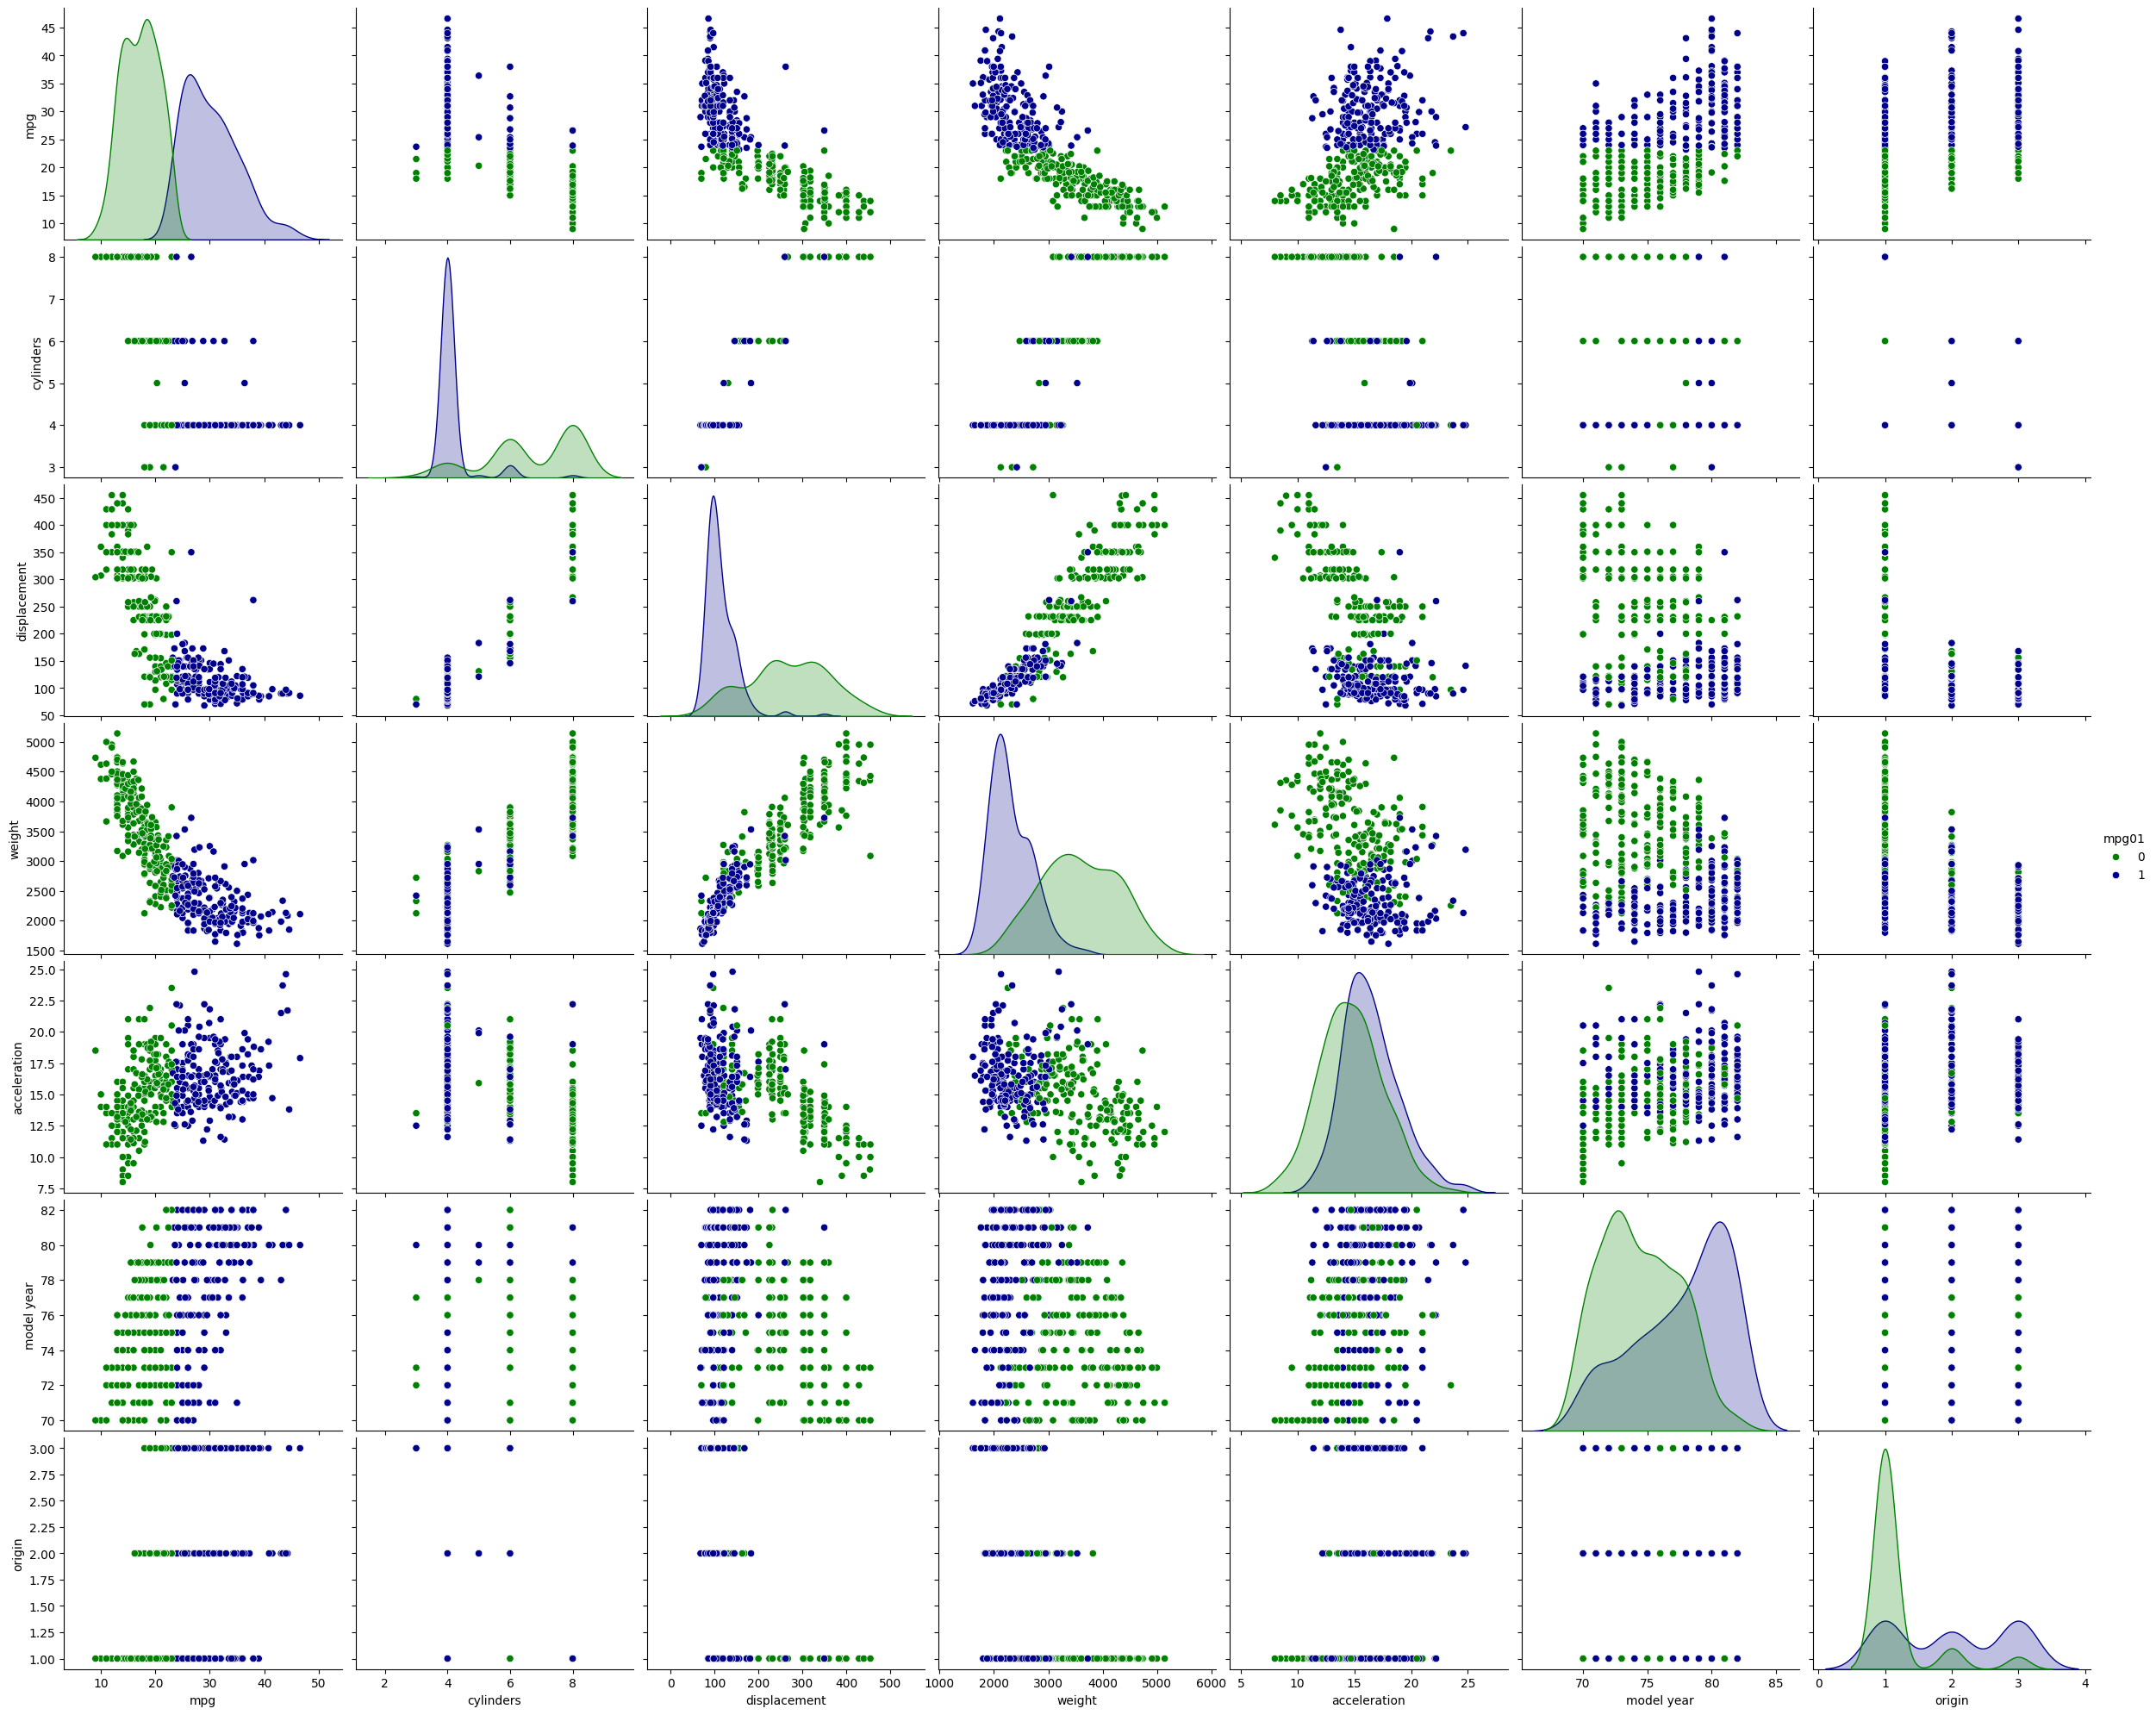

In [69]:
sns.pairplot(donnees,hue="mpg01",palette={0: "green", 1: "darkblue"},
    height=5)
plt.gcf().set_size_inches(25, 20)  
plt.show()

Le problème que nous rencontrons, où la variable horsepower n'apparaît pas dans notre pairplot,
Il semble que la colonne horsepower soit actuellement au format object c'est-à-dire sous forme de chaînes de caractères, alors qu'elle devrait être numérique pour pouvoir être utilisée dans un graphique comme un pairplot.

In [70]:
#donnees['horsepower'].head(10)
donnees['horsepower'] = pd.to_numeric(donnees['horsepower'], errors='coerce')
donnees['horsepower'] = donnees['horsepower'].fillna(donnees['horsepower'].median())
donnees['horsepower'].isna().sum() 

np.int64(0)

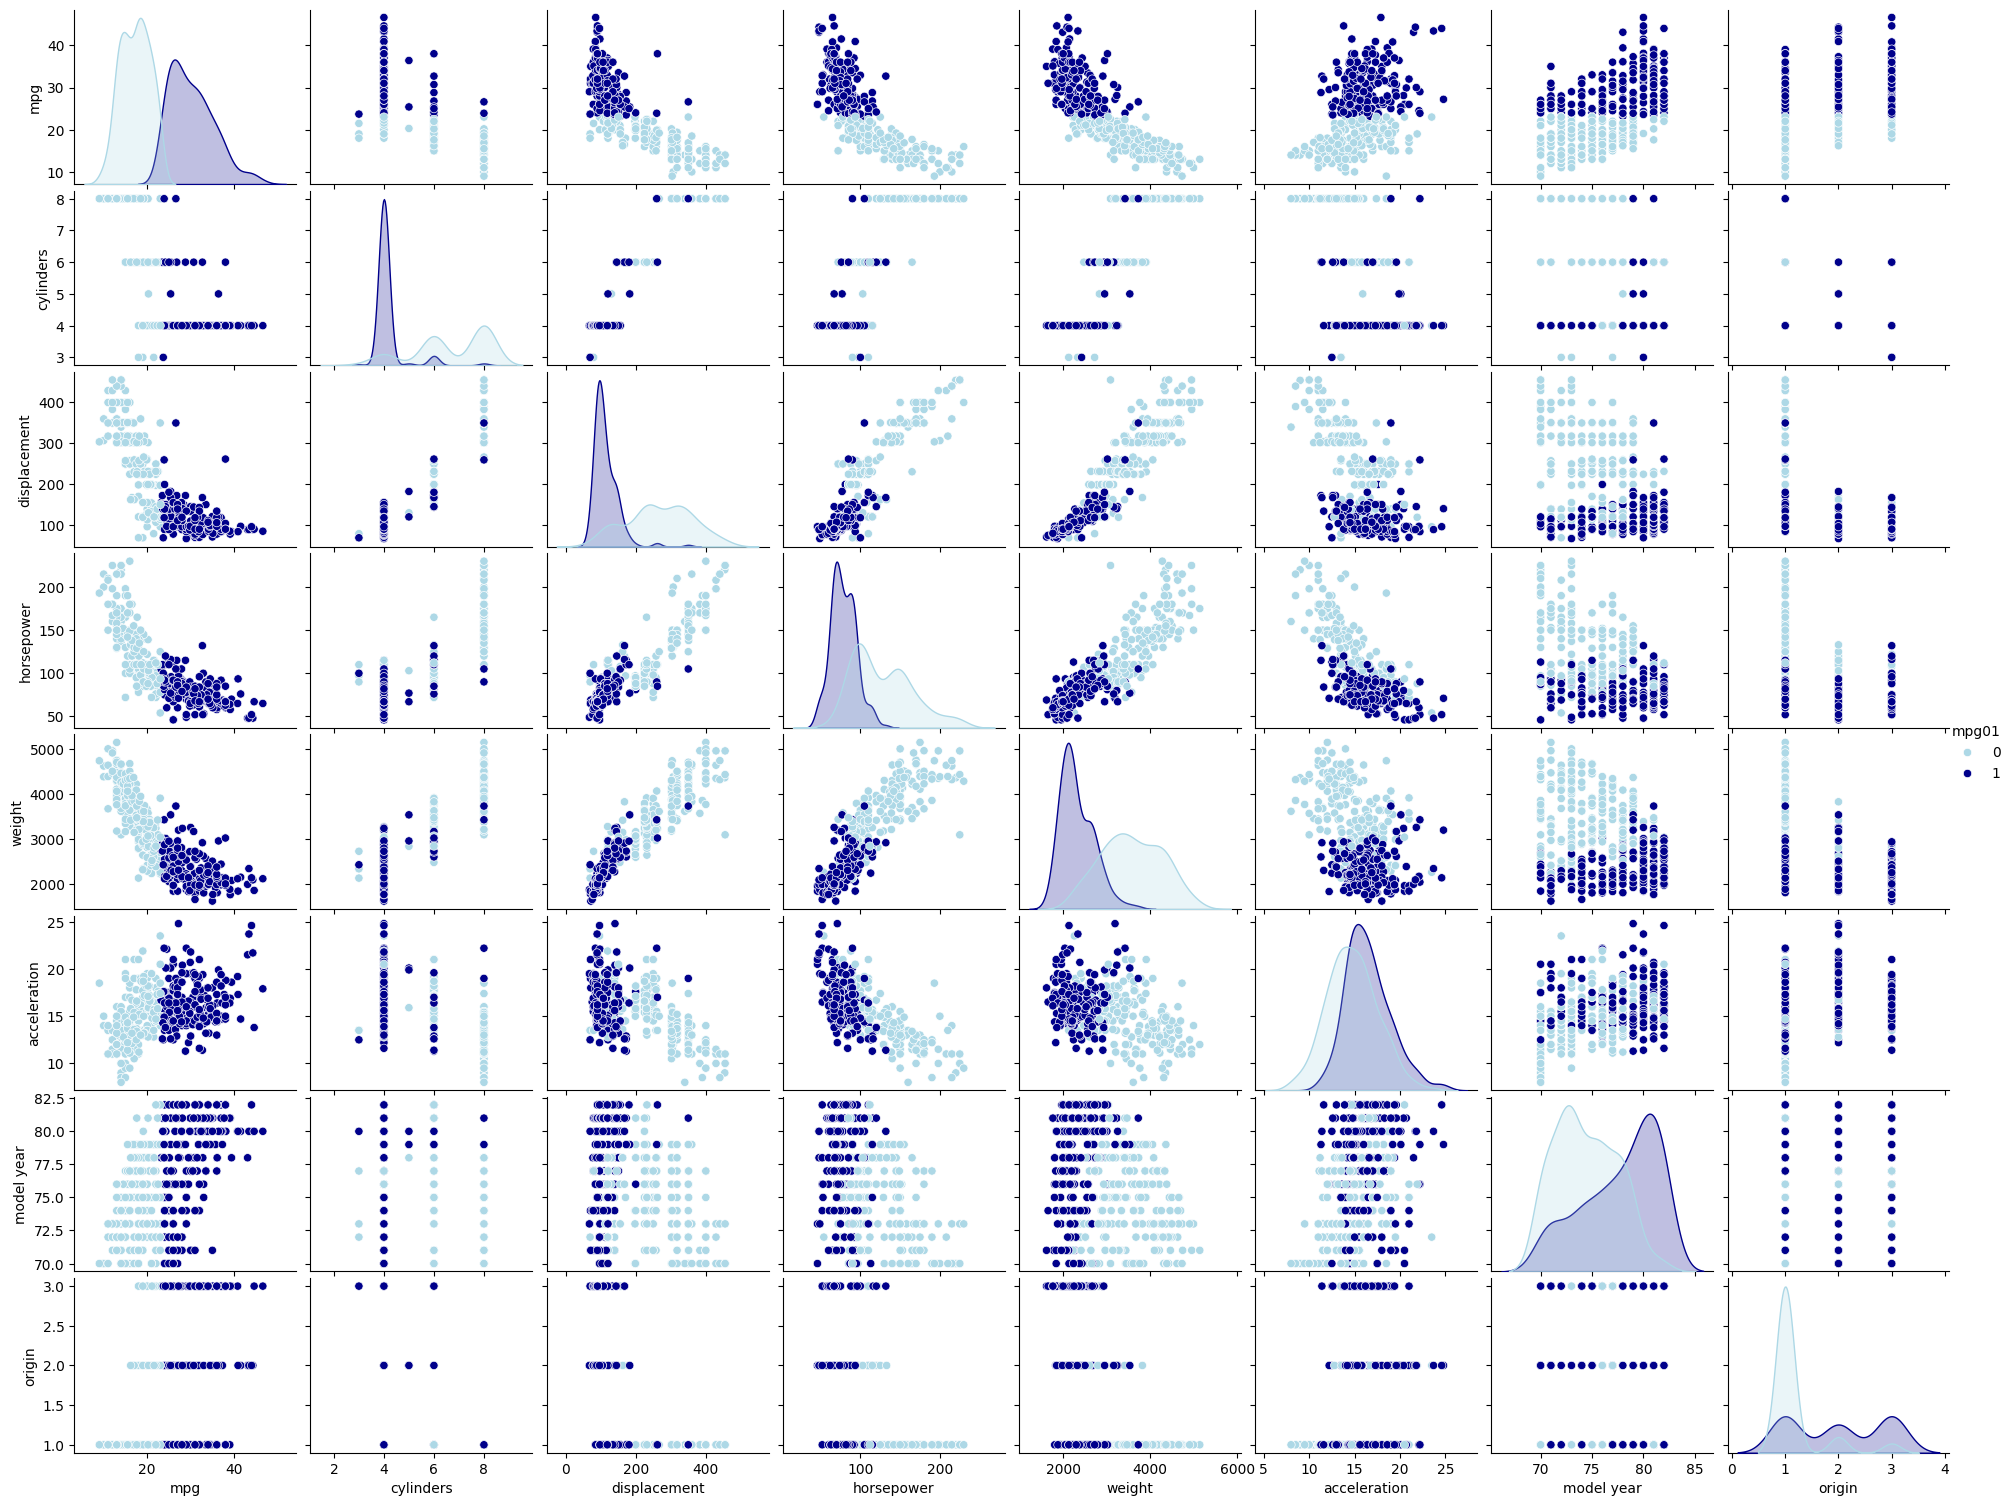

In [78]:
sns.pairplot(donnees,hue="mpg01",palette=["lightblue","darkblue"],height=4)
plt.gcf().set_size_inches(20, 15)  
plt.show()

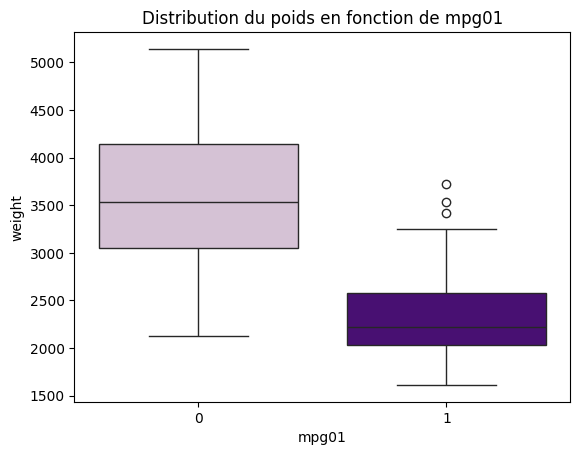

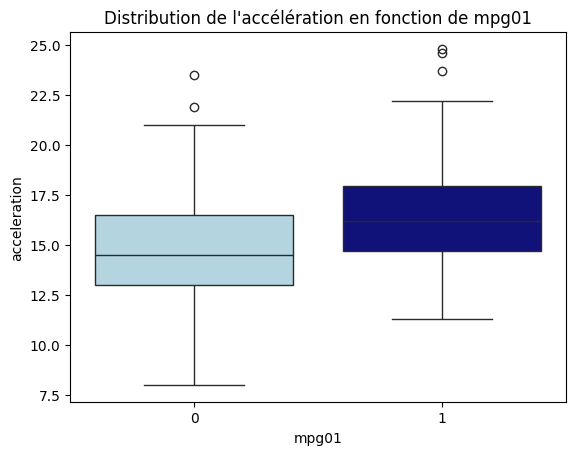

In [81]:
sns.boxplot(data=donnees, x="mpg01", y="weight", palette=["#D8BFD8", "#4B0082"])
plt.title("Distribution du poids en fonction de mpg01")
plt.show()

sns.boxplot(data=donnees, x="mpg01", y="acceleration", palette=["lightblue", "darkblue"])
plt.title("Distribution de l'accélération en fonction de mpg01")
plt.show()

<b>Poids :</b><br>
Le boxplot pour weight montre une différence nette entre les voitures à faible consommation (mpg01 = 1) et celles à consommation élevée (mpg01 = 0). Les voitures à consommation faible ont un poids médian plus bas , tandis que les voitures à consommation élevée présentent des poids plus élevés. Cela confirme la relation négative entre le poids et l'efficacité énergétique.
<br>
<b>Accélération :</b><br>
Le boxplot pour acceleration indique que les voitures à faible consommation (mpg01 = 1) ont une accélération médiane plus élevée, suggérant que les voitures plus rapides tendent à consommer moins de carburant. 

<a href="#report"><button>&#8593;</button></a>

### 4-2.Analyse des Marques par Consommation : <span id="analyse-marques"></span>

Nous analysons la répartition des marques automobiles en fonction des deux types de consommation (mpg01). Cette analyse permet de comprendre si un type de consommation sont associées à un plus grand nombre de marques.

In [82]:
plt.figure(figsize=(20,8))
brands_faible=donnees[donnees["mpg01"]==0]["car_brand"]
brands_elevee=donnees[donnees["mpg01"]==1]["car_brand"]
brand_consommation=pd.DataFrame([["Faible",brands_faible.nunique()],["Elevee",brands_elevee.nunique()]],
                          columns=["Type_Consommation","Nombre de marques"])
brand_consommation

,Type_Consommation,Nombre de marques
0,Faible,22
1,Elevee,26


<Figure size 2000x800 with 0 Axes>

<Axes: >

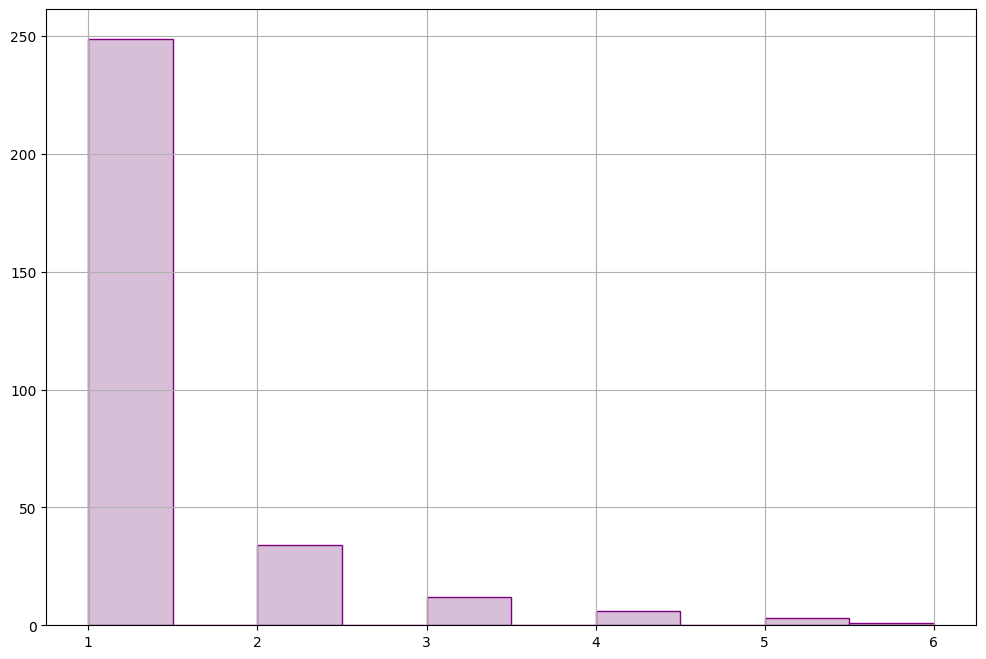

In [86]:
plt.figure(figsize=(12,8))
donnees["car name"].value_counts().hist(color='#D8BFD8', edgecolor='purple')

In [87]:
donnees["car name"].nunique()

305

Puisque la plupart des noms de voitures sont uniques. Il n'y a donc aucune information utile dans cette colonne. Nous pouvons le Supprimer.

In [88]:
donnees.drop("car name",axis=1,inplace=True)

<a href="#report"><button>&#8593;</button></a>

### 4.3 Graphiques pour les caractéristiques catégorielles : <span id="graphiques-categorielles"> </span>

#### a. Nombre de voitures appartenant à chaque origine <span id="graphiques-categorielles"></span>

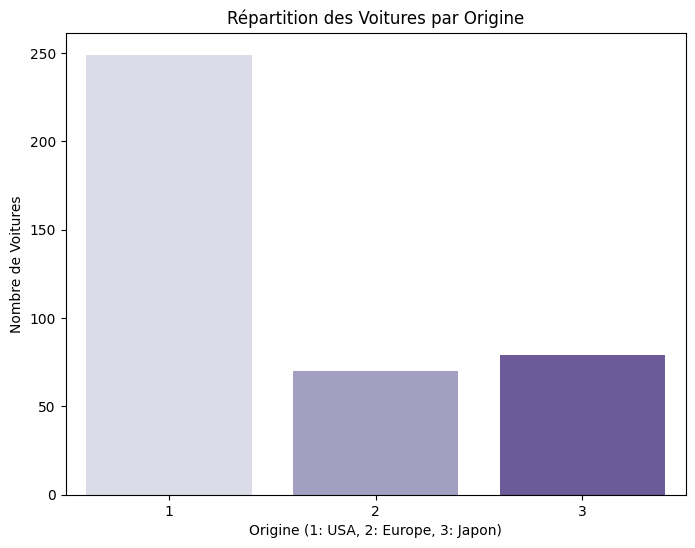

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(data=donnees, x='origin', palette='Purples')
plt.title("Répartition des Voitures par Origine")
plt.xlabel("Origine (1: USA, 2: Europe, 3: Japon)")
plt.ylabel("Nombre de Voitures")
plt.show()

<a href="#report"><button>&#8593;</button></a>

#### b. Nombre de voitures appartenant au nombre total de cylindres présents <span id="graphiques-categorielles"></span>

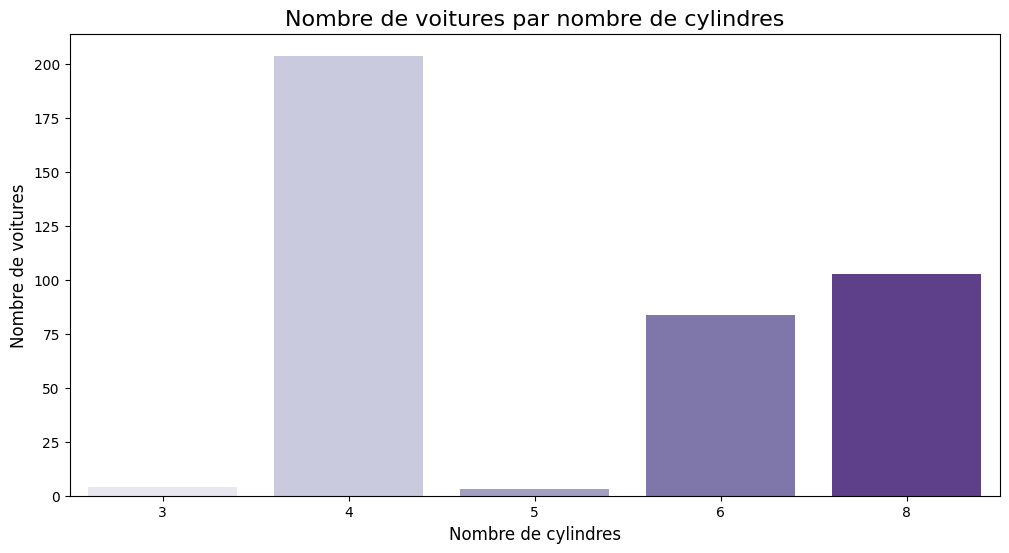

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cylinders', data=donnees, palette='Purples')
plt.title('Nombre de voitures par nombre de cylindres', fontsize=16)
plt.xlabel('Nombre de cylindres', fontsize=12)
plt.ylabel('Nombre de voitures', fontsize=12)
plt.show()

Les voitures à 4 cylindres sont les plus courantes dans l'ensemble des données.
Les voitures avec 6 ou 8 cylindres représentent un pourcentage significatif.
Les autres catégories de cylindres ( 3, 5) sont moins présentes, mais montrent des voitures plus rares.

<a href="#report"><button>&#8593;</button></a>

#### c. Nombre de voitures appartenant au nombre total de cylindres présents dans chaque origine <span id="graphiques-categorielles"></span>

In [91]:
mapping = {1: "USA", 2: "Europe", 3: "Japan"}

In [92]:
donnees["origin"] = donnees["origin"].map(mapping)


In [93]:
donnees.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_brand,mpg01,consommation
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet,0,Élevée
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick,0,Élevée
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth,0,Élevée
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc,0,Élevée
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford,0,Élevée
5,15.0,8,429.0,198.0,4341,10.0,70,USA,ford,0,Élevée
6,14.0,8,454.0,220.0,4354,9.0,70,USA,chevrolet,0,Élevée
7,14.0,8,440.0,215.0,4312,8.5,70,USA,plymouth,0,Élevée
8,14.0,8,455.0,225.0,4425,10.0,70,USA,pontiac,0,Élevée
9,15.0,8,390.0,190.0,3850,8.5,70,USA,amc,0,Élevée


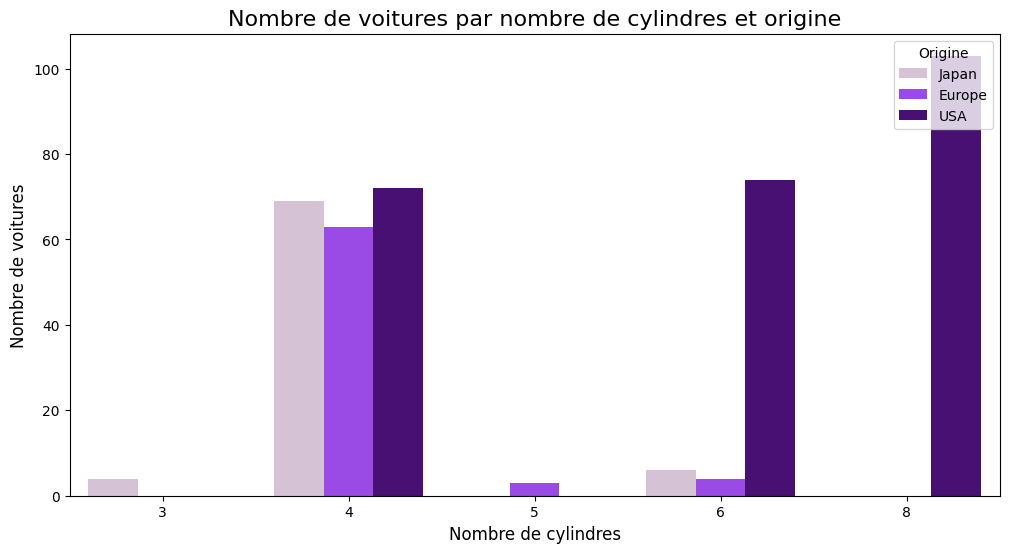

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cylinders', data=donnees, hue='origin', palette = ['#D8BFD8', '#9B30FF', '#4B0082'])
plt.title('Nombre de voitures par nombre de cylindres et origine', fontsize=16)
plt.xlabel('Nombre de cylindres', fontsize=12)
plt.ylabel('Nombre de voitures', fontsize=12)
plt.legend(title='Origine', loc='upper right')
plt.show()

**USA :** Le nombre de voitures avec 8 cylindres est le plus élevé.<br>
**Europe :** Une majorité de voitures a 4 cylindres.<br>
**Japon :** La majorité des voitures japonaises ont également 4 cylindres.

<a href="#report"><button>&#8593;</button></a>

#### d. Nombre de voitures appartenant à chaque année modèle <span id="graphiques-categorielles"></span>

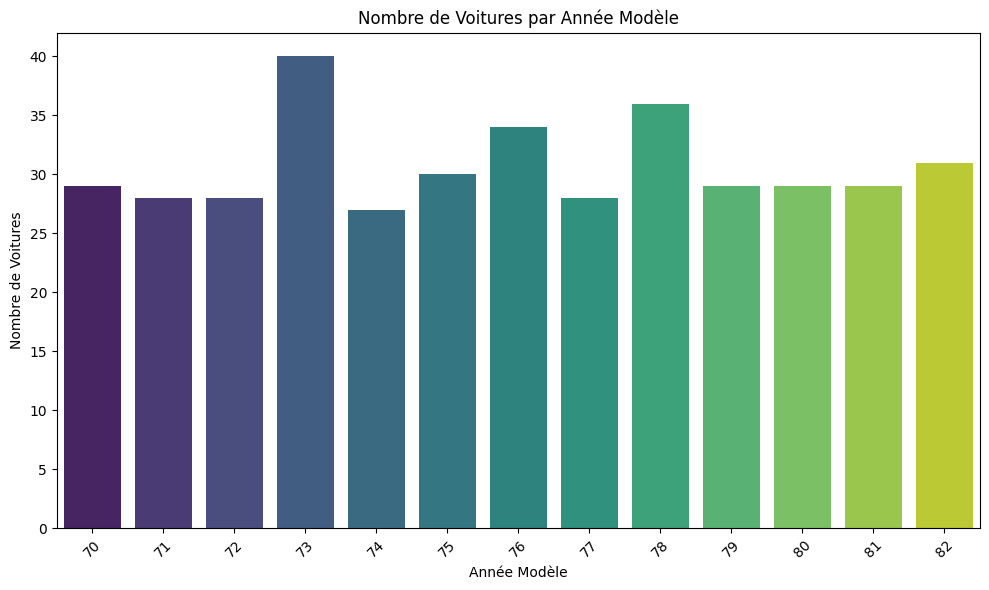

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='model year', data=donnees, palette='viridis')
plt.title('Nombre de Voitures par Année Modèle')
plt.xlabel('Année Modèle')
plt.ylabel('Nombre de Voitures')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Les voitures de l'année-modèle 73 ont le plus grand nombre de voitures.<br>
Les autres années-modèles sont réparties presque de la même manière.

<a href="#report"><button>&#8593;</button></a>

## 5.Analyse de Corrélation entre les données  <span id="correlation"></span>

In [98]:
donnees.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car_brand        object
mpg01             int64
consommation     object
dtype: object

In [99]:
numerique_donnees = donnees.select_dtypes(include=['number'])

Les colonnes "car brand" (texte) et "consommation" doivent être exclues pour la corrélation, car elles ne peuvent pas être converties directement en float.
Seules les colonnes comme mpg, cylinders, displacement, etc., seront prises en compte dans la matrice de corrélation.

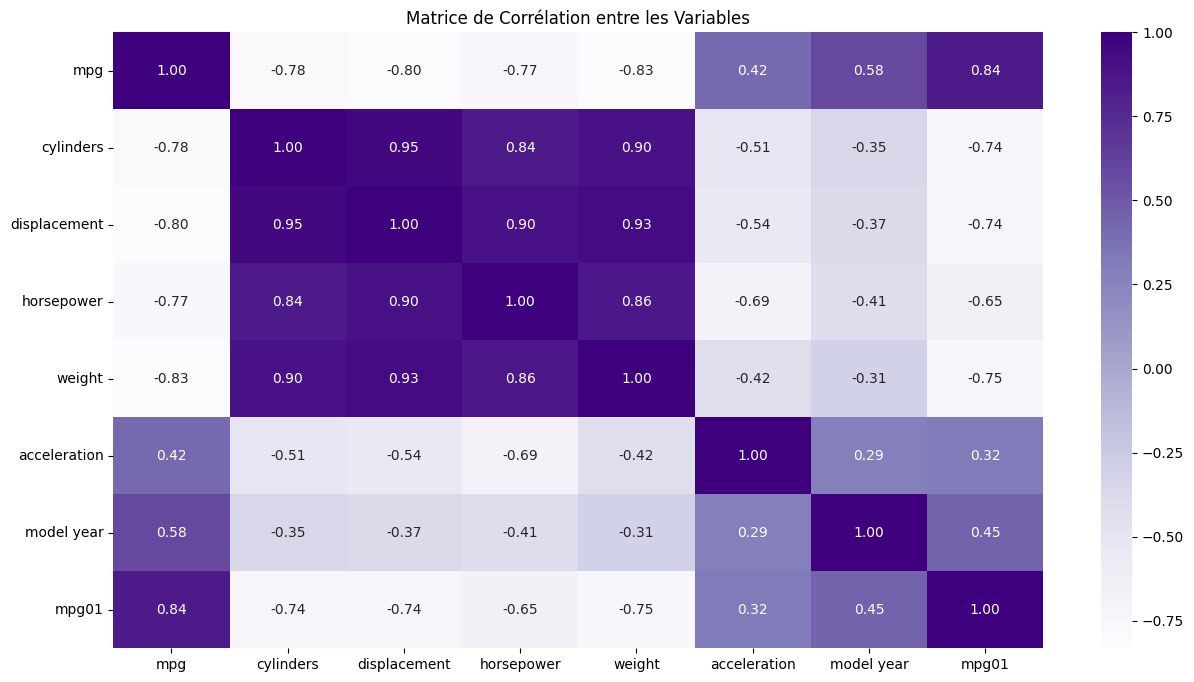

In [148]:
#numerique_donnees.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(numerique_donnees.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.title("Matrice de Corrélation entre les Variables")
plt.show()

**Corrélation forte :** 

mpg a une forte corrélation positive avec mpg01 (+0.84).
weight a une forte corrélation négative avec mpg (-0.83).

**Corrélations intéressantes pour mpg01 :**

Positivement corrélé avec mpg (+0.837), ce qui est logique puisque mpg01 est basé sur mpg.
Négativement corrélé avec des caractéristiques telles que weight (-0.75), cylinders (-0.74), et displacement (-0.74).

**Faibles corrélations :**

Certaines variables comme acceleration et origin ont des corrélations plus faibles avec mpg ou mpg01.



----->La matrice de corrélation met en évidence les relations entre les différentes caractéristiques. On observe que la consommation de carburant (mpg) est fortement corrélée négativement avec le poids (weight), le nombre de cylindres (cylinders), et la cylindrée (displacement). À l'inverse, mpg montre une corrélation positive notable avec l'accélération (acceleration) et l'année du modèle (model year). Ces tendances confirment que les voitures plus modernes et légères consomment généralement moins de carburant.

--->Les USA ont le plus grand nombre de voitures dans le dataset, ce qui pourrait indiquer une forte dominance des modèles américains.<br>
---->Le Japon et l'Europe ont un nombre presque équivalent de voitures, représentant une part plus équilibrée par rapport aux USA.

<a href="#report"><button>&#8593;</button></a>

## 6-Préparation des Données pour la Modélisation <span id ="preparation-donnees"> </span>


### 6.1. Séparation des Données en Enseignement et Test : <span id ="separation-donnees"> </span>


<center>
<img src="./train_test.jpeg" width="500" height='200'>
</center>

In [101]:
from sklearn.preprocessing import LabelEncoder
# Encoder la colonne 'origin'
label_encoder = LabelEncoder()
donnees['origin'] = label_encoder.fit_transform(donnees['origin'])

In [102]:
from sklearn.model_selection import train_test_split

X = donnees[['weight', 'acceleration', 'displacement', 'cylinders','model year','origin','horsepower']]  
y = donnees['mpg01']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ensemble d'entraînement X: {X_train.shape}, y: {y_train.shape}")
print(f"Ensemble de test X: {X_test.shape}, y: {y_test.shape}")

Ensemble d'entraînement X: (318, 7), y: (318,)
Ensemble de test X: (80, 7), y: (80,)


In [103]:
X.head()

,weight,acceleration,displacement,cylinders,model year,origin,horsepower
0,3504,12.0,307.0,8,70,2,130.0
1,3693,11.5,350.0,8,70,2,165.0
2,3436,11.0,318.0,8,70,2,150.0
3,3433,12.0,304.0,8,70,2,150.0
4,3449,10.5,302.0,8,70,2,140.0


<a href="#report"><button>&#8593;</button></a>

## 7- Modélisation <span id ="modelisation"> </span>

<center>
<img src="./model.PNG" width="500" height='200'>


</center>

<a href="#report"><button>&#8593;</button></a>

### 7.1. Analyse Discriminante Linéaire (LDA) : <span id ="lda"> </span>

In [105]:
# Importation des bibliothèques nécessaires
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

In [109]:
# Création du modèle LDA
model_lda = LinearDiscriminantAnalysis()
# Entraînement du modèle sur les données d'entraînement
model_lda.fit(X_train, y_train)
# Prédictions sur l'ensemble de test
y_pred = model_lda.predict(X_test)

<h5>a) Exactitude (Accuracy) : 0.9250 </h5>

In [107]:
# Calcul de l'exactitude (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude (Accuracy) du modèle LDA : {accuracy:.4f}")

Exactitude (Accuracy) du modèle LDA : 0.9250


C'est un excellent score, indiquant que le modèle est performant pour prédire si la consommation de carburant est élevée ou faible.<br>

<h5>b) Matrice de confusion :  </h5>

In [108]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

Matrice de confusion :
[[35  6]
 [ 0 39]]



    - 35 voitures ont été correctement classées comme ayant une faible consommation de carburant.
    - 6 voitures ont été incorrectement classées comme ayant une consommation élevée.
    - 39 voitures ont été correctement classées comme ayant une consommation élevée.
    - 0 voiture a été incorrectement classée comme ayant une consommation faible. 

<h5>c) Taux d'erreur : 0.0750</h5>

In [110]:
# Calcul de l'erreur de test (error rate)
error_rate = 1 - accuracy
print(f"Taux d'erreur du modèle LDA : {error_rate:.4f}")

Taux d'erreur du modèle LDA : 0.0750


    ==> 7,5 % des prédictions sont incorrectes. C'est un taux d'erreur relativement faible, ce qui indique que le modèle est fiable.

<a href="#report"><button>&#8593;</button></a>

### 7.2. Analyse Discriminante Quadratique (QDA) : <span id ="qda"> </span>

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

In [112]:
# Création du modèle QDA
model_qda = QuadraticDiscriminantAnalysis()

# Entraînement du modèle sur les données d'entraînement
model_qda.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_qda = model_qda.predict(X_test)

<h5>a) Exactitude (Accuracy) : 0.9125 </h5>

In [114]:
# Exactitude (Accuracy) du modèle QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Exactitude (Accuracy) du modèle QDA : {accuracy_qda:.4f}")

Exactitude (Accuracy) du modèle QDA : 0.9125


    ==> 91.25 % de prédictions correctes.

<h5>b) Matrice de confusion :  </h5>

In [116]:
# Matrice de confusion
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print(f"Matrice de confusion :\n{conf_matrix_qda}")

Matrice de confusion :
[[36  5]
 [ 2 37]]


- 36 voitures ont été correctement classées comme ayant une faible consommation (0). Cela signifie que le modèle a bien prédit les voitures à faible consommation.
- 5 voitures ont été incorrectement classées comme ayant une consommation élevée (1). Ce sont des faux positifs.
- 37 voitures ont été correctement classées comme ayant une consommation élevée (1).
- 2 voitures ont été incorrectement classées comme ayant une consommation faible (0). Ce sont des faux négatifs.

<h5>c) Taux d'erreur : 0.0875 </h5>

In [115]:
# Calcul du taux d'erreur
error_rate_qda = 1 - accuracy_qda
print(f"Taux d'erreur du modèle QDA : {error_rate_qda:.4f}")

Taux d'erreur du modèle QDA : 0.0875


    ==> 8.75 % des prédictions sont incorrectes. C'est un taux d'erreur relativement faible.

### 7.3. LDA ou QDA : <span id ="lq"> </span>

<div style="display: flex; align-items: center;">
  <p>
  <b>LDA :</b> Très bonne performance, avec aucun faux négatif pour la classe de consommation élevée (mpg01=1).<br>
  <b>QDA :</b> Moins précis, avec quelques erreurs (faux positifs et faux négatifs).<br><br>
  ==> Même si QDA offre une bonne précision globale, LDA semble mieux adapté pour prédire les deux classes dans ce cas précis. 
  </p>
  
  <img src="./inter.PNG" width="500" height='200' style="margin-left: 20px;">
</div>

<a href="#report"><button>&#8593;</button></a>

### 7.4. Régression Logistique :<span id ="logistique"> </span>

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [118]:
# Création du modèle de régression logistique
model_lr = LogisticRegression(max_iter=1000)

# Entraînement du modèle sur les données d'entraînement
model_lr.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_lr = model_lr.predict(X_test)

<h5>a) Exactitude (Accuracy) : 0.9375 </h5>

In [121]:
# Exactitude (Accuracy) du modèle
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Exactitude (Accuracy) du modèle régression logistique : {accuracy_lr}")


Exactitude (Accuracy) du modèle régression logistique : 0.9375



    93,75% de prédictions correctes.

<h5>b) Matrice de confusion :  </h5>

In [122]:
#Matrice de confusion
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(f"Matrice de confusion :\n{conf_matrix_lr}")

Matrice de confusion :
[[39  2]
 [ 3 36]]


- 39 voitures  avec une faible consommation de carburant ont été correctement classées comme telles.
- 2 voitures avec une faible consommation ont été incorrectement classées comme ayant une consommation élevée.
- 36 voitures avec une consommation élevée ont été correctement classées.
- 3 voitures avec une consommation élevée ont été incorrectement classées comme ayant une consommation faible.

<h5>c) Taux d'erreur : 0.0625 </h5>

In [123]:
# Calcul du taux d'erreur
error_rate_lr = 1 - accuracy_lr
print(f"Taux d'erreur du modèle régression logistique : {error_rate_lr}")

Taux d'erreur du modèle régression logistique : 0.0625


Le modèle a fait des erreurs sur seulement <b>6,25% </b>des données de test.

<div style="display: flex; align-items: center;">
  <p>
  <u>La régression logistique </u> a montré une meilleure performance avec une exactitude de <b>93,75% </b>, suivie de LDA à <b>92,50% </b>et QDA à <b>91,25%.</b><br><br>
  <u>La régression logistique </u>a le plus faible taux d'erreur <b>6,25%</b>, ce qui indique une meilleure capacité à éviter les erreurs par rapport à LDA <b>7,50%</b> et QDA <b>8,75%</b>.<br><br>
  LDA a bien géré les deux classes, en particulier la classe de consommation élevée (mpg01=1), où il n'y a eu aucun faux négatif.
QDA a montré un peu plus d'incertitude dans ses prédictions avec 2 faux négatifs pour la classe de consommation élevée et 5 faux positifs pour la classe faible.<br><br>
<u>Régression logistique</u> a eu un léger compromis avec 3 faux négatifs pour la classe élevée, mais globalement a performé très bien avec 2 faux positifs pour la classe faible.</p>
  <img src="./lr.PNG" width="400" height='200' style="margin-left: 20px;">
</div>

<a href="#report"><button>&#8593;</button></a>

### 7.5. K-Nearest Neighbors (KNN) : <span id ="knn"> </span>

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [126]:
stock_erreur = []
for k in range(1, 21): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)  
    error_rate = 1 - accuracy_score(y_test, y_pred)  
    stock_erreur.append(error_rate)

<h5> a) La meilleure valeur de K </h5>

In [127]:
meilleure_k = stock_erreur.index(min(stock_erreur)) + 1
print(f"La meilleure valeur de K est : {meilleure_k}")

La meilleure valeur de K est : 3


<h5>b) Taux d'erreur : 0.1250 </h5>

In [129]:
print(f"Le taux d'erreur le plus bas est : {min(stock_erreur):.4f}")

Le taux d'erreur le plus bas est : 0.1250


<h5>c) Résultats </h5>

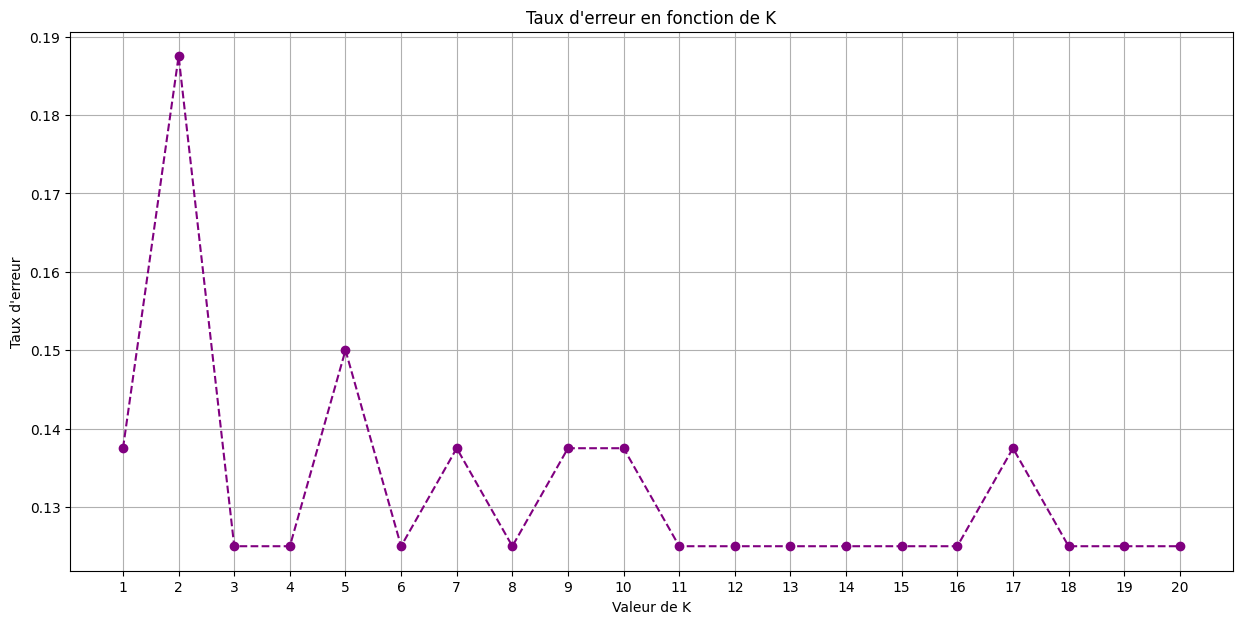

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(range(1, 21), stock_erreur, marker='o', linestyle='--', color='purple')
plt.xlabel('Valeur de K')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreur en fonction de K')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

<a href="#report"><button>&#8593;</button></a>

## 8- Évaluation et Conclusion <span id ="evaluation"> </span>

### 8.1. Résumé des résultats des modèles :<span id ="resume-resultats"> </span>

<center>
<img src="./Exploration_Models.png"  height='600'>
</center>

<a href="#report"><button>&#8593;</button></a>

### 8.2. Analyse comparative des modèles :<span id ="analyse-comparative"> </span>

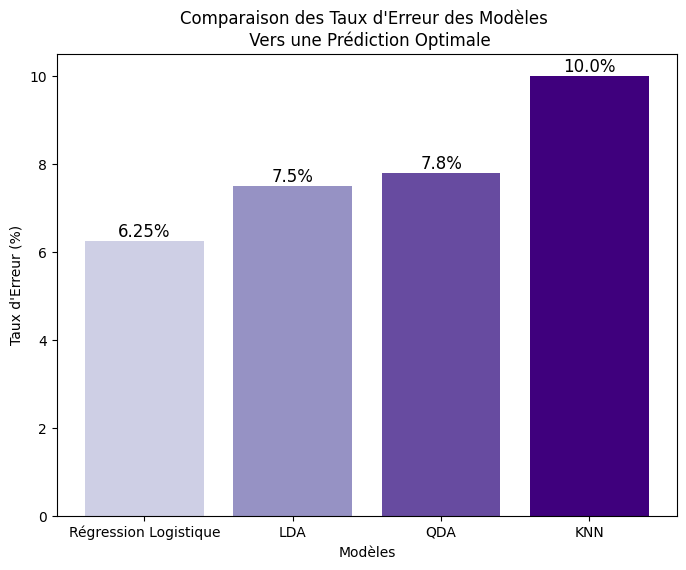

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Données
models = ['Régression Logistique', 'LDA', 'QDA', 'KNN']
error_rates = [6.25, 7.5, 7.8, 10.0]  # Taux d'erreur en pourcentage

# Création du dégradé de couleurs purples
colors = plt.cm.Purples(np.linspace(0.3, 1, len(error_rates)))

# Création du graphique
plt.figure(figsize=(8,6))
bars = plt.bar(models, error_rates, color=colors)

# Ajout des labels et titre
plt.xlabel('Modèles')
plt.ylabel('Taux d\'Erreur (%)')
plt.title('Comparaison des Taux d\'Erreur des Modèles \n Vers une Prédiction Optimale')

# Ajouter des annotations avec les pourcentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval , f'{yval}%', ha='center', va='bottom', fontsize=12)

plt.show()


<a href="#report"><button>&#8593;</button></a>

### 8.3. Conclusion générale : <span id ="conclusion-generale"> </span>

<div style="display: flex; align-items: center;">
<p>
Parmi les modèles testés, <b>la régression logistique</b> se distingue comme étant le plus performant, avec le taux d'erreur le plus faible. Ce modèle offre une précision supérieure et représente ainsi le choix optimal pour cette tâche.<br><br>
En revanche, les modèles <b>LDA</b>et <b>QDA</b>, bien qu'efficaces et valables, présentent des résultats légèrement moins précis, avec un taux d'erreur légèrement plus élevé. Cela suggère que, même s'ils restent des alternatives solides, ils ne surpassent pas la régression logistique dans ce cas particulier.<br><br>
Quant au modèle <b>KNN</b>, bien qu'il affiche un taux d'erreur plus élevé, il reste une option pertinente, notamment dans des contextes où la simplicité et la flexibilité sont des critères importants. Ce modèle pourrait être utile lorsqu'il est nécessaire de traiter des données de manière non paramétrique ou lorsque la performance n'est pas le facteur principal.
</p>
<img src="./choix.jpg" width="200" height="200" style="margin-left: 20px;">
</div>

    ==> En résumé, la régression logistique semble être le meilleur choix pour prédire mpg01, car elle a montré le taux d'erreur le plus bas parmi les modèles testés. 
    Elle est non seulement performante, mais aussi facile à interpréter et à déployer. Cela en fait une solution robuste notre problème de classification binaire, où l'objectif est de prédire la consommation de carburant (faible ou élevée) d'un véhicule.

<a href="#report"><button>&#8593;</button></a>

## 9- Références <span id ="references"> </span>


### Scikit-learn Documentation
La documentation officielle de scikit-learn, contenant des explications détaillées, des tutoriels et des exemples de code pour les algorithmes d'apprentissage automatique.
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)

### Kaggle
Un site de compétition en machine learning avec des ensembles de données gratuits et des kernels (notebooks) partagés par la communauté pour apprendre et tester vos compétences.
- [Kaggle](https://www.kaggle.com/)

### Machine Learning Mastery
Un blog bien connu qui propose des tutoriels et des guides sur l'apprentissage automatique avec des exemples pratiques en Python.
- [Machine Learning Mastery](https://machinelearningmastery.com/)

<br>

### Description des données 
- `mpg`: consommation de carburant (miles per gallon) 
- `weight`: poids de la voiture (en livres) 
- `acceleration`: accélération de la voiture (en m/s²) 
- `horsepower`: puissance du moteur (en chevaux)

<a href="#report"><button>&#8593;</button></a>

 <div style="margin-top: 30px; text-align: center; padding: 15px; background-color: #fdfdfd; border: 2px dashed #2980b9; border-radius: 10px;">
    <h2 style="font-size: 1.8em; font-family: 'Georgia', serif; color: #2c3e50; margin-bottom: 10px;">&#128075; Merci pour votre attention !</h2>
    <p style="font-size: 1.2em; font-family: 'Arial', sans-serif; color: #34495e;">Nous espérons que cette présentation a été claire et enrichissante.</p>
  </div>